In [8]:
import pandas as pd
import seaborn as sns
import numpy as np
from tqdm import tqdm, trange
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('final.csv', on_bad_lines='skip', sep=';')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645874 entries, 0 to 645873
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_id           645874 non-null  object
 1   date_             645874 non-null  object
 2   prosmotr          645874 non-null  int64 
 3   story_id          645874 non-null  int64 
 4   age               645874 non-null  int64 
 5   device_type       645870 non-null  object
 6   app_or_web        645874 non-null  object
 7   browser           645871 non-null  object
 8   os                645871 non-null  object
 9   gender            645874 non-null  object
 10  geo_country       645817 non-null  object
 11  geo_region        637142 non-null  object
 12  geo_city          568252 non-null  object
 13  day_of_week       645390 non-null  object
 14  user_hour         645390 non-null  object
 15  button_tap_flg    645874 non-null  int64 
 16  like_tap_flg      645874 non-null  int

In [34]:
def check_prosmotrs(a, b):
    data_p = data[(data.age >= a) & (data.age <= b)]
    return int(data_p.prosmotr.value_counts())
def which_categ(ag):
    if ag >= 14 and ag <= 19:
        return 'Подростки'
    if ag >= 20 and ag <= 35:
        return 'Молодые'
    if ag >= 36 and ag <= 55:
        return 'Взрослые'
    else:
        return 'Пенсионеры'

In [23]:
n = set(data['name'])
check_prosmotrs(7, 13)

148

In [39]:
themes = {
    'Статистика': [],
    'Реклама': []
}
data2 = data[~(data.name.isna())]
names = data2['name']
for i in tqdm(names):
    if 'ваш' in i.lower():
        themes['Статистика'].append(" ".join(i.split()).replace('\xa0', ' '))
stats_unique = set(themes['Статистика'])
stats_unique.discard('Ваша карта уже в пути')
stats_unique.discard('Топ-5 игр для вашего смартфона')
stats_unique.discard('Счет для вашего бизнеса')
stats_unique.discard('Оцените ваш поход в ресторан')
stats_unique.discard('На вашей карте 10% годовых')
print(stats_unique)
#ура, статистику починили. теперь рекламу

100%|██████████| 381224/381224 [00:00<00:00, 405790.85it/s]

{'Ваш самый дорогой ресторан', 'Ваш поход в ресторан', 'Ваша Инвест- копилка', 'Ваша подписка Tinkoff Pro', 'Ваше время на вкладке «Платежи»', 'Ваша первая акция', 'Ваш доход с Tinkoff Pro', 'Ваши траты на продукты', 'Ваши друзья– инвесторы', 'Ваша первая покупка для питомца', 'Ваша первая покупка в Тинькофф', 'Ваши письма в прошлое', 'Ваше первое кино с Тинькофф', 'Ваша карта Tinkoff Black', 'Ваша первая трата на авто', 'Ваши траты на авто', 'Ваши инвестиции за неделю'}


<AxesSubplot: ylabel='age'>

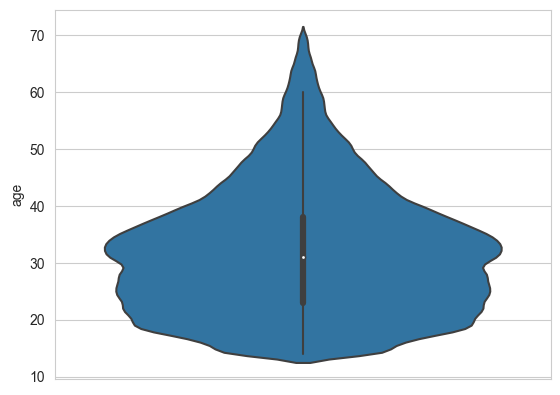

In [33]:
data_age = data[(data.age <= 70) & (data.age >= 14)]
sns.violinplot(y='age', data=data_age)

In [7]:
#Выделим несколько возрастных категорий
#7-13 лет -- таких там мало
#14-19 -- подростки
#20-35 -- молодые
#36-55 -- взрослые
#56-70 -- пенсионеры
#Мало людей после 70 лет пользуется банком

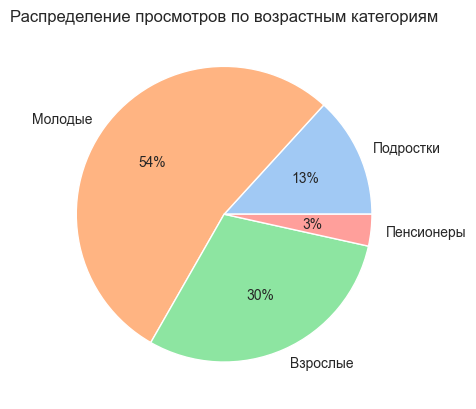

In [44]:
ages = [check_prosmotrs(14, 19), check_prosmotrs(20, 35), check_prosmotrs(36, 55), check_prosmotrs(56, 70)]
name_ages = ['Подростки', 'Молодые', 'Взрослые', 'Пенсионеры']
colors = sns.color_palette('pastel')[ 0:5 ]
plt.pie(ages, labels=name_ages, colors=colors, autopct='%.0f%%')
plt.title('Распределение просмотров по возрастным категориям')
plt.show()

In [42]:
#посмотрим, кто какие сториз смотрит
data2 = data_age[~(data_age.name.isna())]
age_p = {
    'Подростки' : set(),
    'Молодые' : set(),
    'Взрослые' : set(),
    'Пенсионеры' : set()
}
for i in tqdm(data2.iloc):
    age_p[which_categ(i['age'])].add(" ".join(i['name'].split()).replace('\xa0', ' '))
age_p['Пенсионеры']

379992it [01:16, 4937.80it/s]


{'1000 за друга',
 '2250 за друга',
 '3 типа расходов',
 '3000 за друга',
 '4 главные уловки в магазинах',
 '4 телеграм- канала про экологию',
 '5 плюсов ОСАГО в Тинькофф',
 '5 признаков продавцов- мошенников',
 '5 частых травм',
 '6 мифов о китайских авто',
 '6 мифов про мозг',
 '6 необычных хобби',
 '600 минут в месяц бесплатно',
 '7 ошибок в питании',
 'F.A.Q. и горячая линия',
 'Автоплатеж на телефон и интернет',
 'Авторынок в новых условиях',
 'Акции недели',
 'Безлимит на главное',
 'Безопасные покупки в интернете',
 'Безопасный интернет для детей',
 'Безумные объявления об аренде',
 'Бесплатная кредитка',
 'Бесплатная связь',
 'Бесплатные переводы в СНГ',
 'Бинго заминок у кассы',
 'Блогер о Tinkoff Black',
 'Боевые старички',
 'Больше бонусов за друзей',
 'Больше в ленте «Для вас»',
 'Больше дохода с Tinkoff Pro',
 'Браузерные игры',
 'Быстрый перевод денег',
 'Бюджет 50/30/20',
 'В круиз на поезде',
 'Ваш доход с Tinkoff Pro',
 'Ваш поход в ресторан',
 'Ваш самый дорогой ресто

In [41]:
#чё то вообще не помогло
#ребят, а как лучше сравнить активность среди людей? по среднему или по сумме всех значений?

False